In [4]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pystan
import scipy.stats as stats

import scipy.stats as stats

In [5]:
coin_code = """
data {
    int<lower=0> n; // number of tosses
    int<lower=0> y; // number of heads
}
transformed data {}
parameters {
    real<lower=0, upper=1> p;
}
transformed parameters {}
model {
    p ~ beta(2, 2);
    y ~ binomial(n, p);
}
generated quantities {}
"""

coin_dat = {
             'n': 100,
             'y': 61,
            }

fit = pystan.stan(model_code=coin_code, data=coin_dat, iter=1000, chains=1)
#fit = pystan.stan(file='coin_code.stan', data=coin_dat, iter=1000, chains=1)

In [6]:
print(fit)

Inference for Stan model: anon_model_7f1947cd2d39ae427cd7b6bb6e6ffd77.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p       0.6  4.5e-3   0.05   0.51   0.58   0.61   0.63   0.69    105    1.0
lp__ -70.21    0.07   0.71 -72.34 -70.32 -69.92 -69.78 -69.74    102   1.01

Samples were drawn using NUTS(diag_e) at Tue Oct  6 09:18:52 2015.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [7]:
coin_dict = fit.extract()
coin_dict.keys()
# lp_ is the log posterior

KeysView(OrderedDict([('p', array([ 0.5849,  0.6032,  0.6161,  0.6406,  0.5578,  0.5511,  0.5845,
        0.5935,  0.6055,  0.6308,  0.6219,  0.5853,  0.5001,  0.649 ,
        0.56  ,  0.5821,  0.6758,  0.5972,  0.5986,  0.6453,  0.6075,
        0.5348,  0.6184,  0.6529,  0.5438,  0.5766,  0.5906,  0.6449,
        0.5919,  0.5979,  0.5434,  0.5007,  0.6288,  0.6595,  0.6078,
        0.6273,  0.6336,  0.5237,  0.5512,  0.5237,  0.5705,  0.605 ,
        0.6121,  0.5118,  0.7063,  0.6399,  0.6078,  0.6135,  0.6015,
        0.4795,  0.5954,  0.5643,  0.6487,  0.58  ,  0.6044,  0.6002,
        0.5955,  0.5841,  0.6152,  0.6517,  0.6099,  0.6342,  0.5969,
        0.5858,  0.5916,  0.612 ,  0.6146,  0.6504,  0.5188,  0.6575,
        0.5784,  0.6214,  0.5267,  0.6073,  0.4621,  0.6644,  0.5658,
        0.6635,  0.5984,  0.6505,  0.6464,  0.5102,  0.566 ,  0.7129,
        0.6163,  0.5673,  0.5658,  0.6334,  0.6098,  0.6946,  0.6664,
        0.6404,  0.6248,  0.6976,  0.6066,  0.5549,  0.6875,  

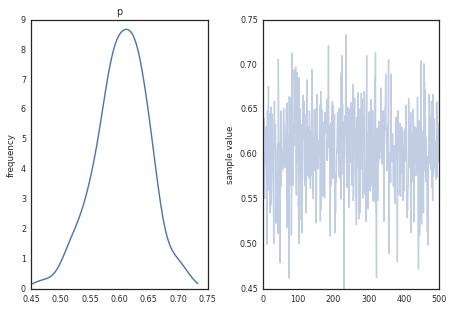

In [8]:
fit.plot('p');
plt.tight_layout()